# Introduction to Data Visualization in SeaBorn
This notebook servers as a reference to the most basic concepts, best practices and tricks for data visualization. The content of this notebook is inspired by the ***Introduction to Data Visualization With Seaborn*** By [datacamp](https://app.datacamp.com/learn/courses/introduction-to-data-visualization-with-seaborn)

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

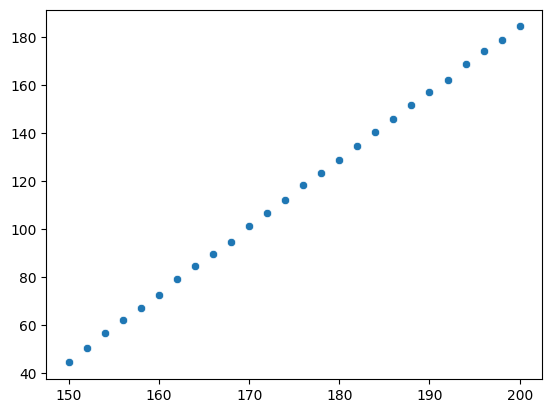

In [3]:
## first plot: scatter plot

height = np.linspace(150, 200, 26)
weight = np.linspace(45, 185, 26) + np.array([0.5 * np.random.randint(-1, 2) for _ in range(26)]) # adding some noise

sns.scatterplot(y=weight, x=height)


## Searborn With Pandas.DataFrame
It might be worthy to consider the [documentation](https://seaborn.pydata.org/generated/seaborn.countplot.html) for more details

     country food_category  consumption  co2_emission
0  Argentina          pork        10.51         37.20
1  Argentina       poultry        38.66         41.53
2  Argentina          beef        55.48       1712.00
3  Argentina     lamb_goat         1.56         54.63
4  Argentina          fish         4.36          6.96


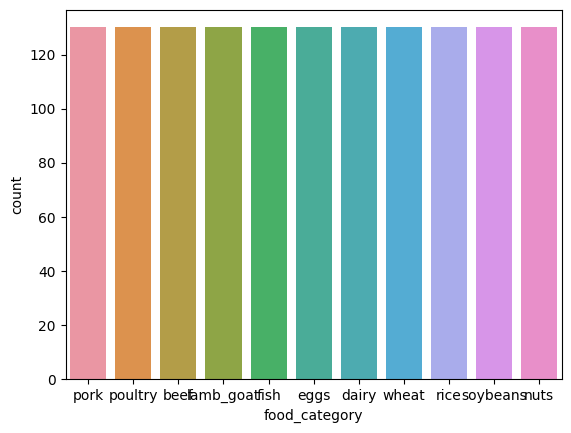

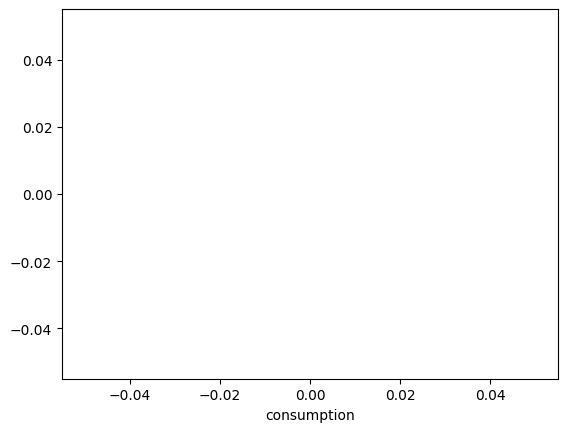

In [4]:
# count plot with a pandas dataframe
# the main idea is as
food_consumption_link = "https://assets.datacamp.com/production/repositories/5786/datasets/49f6356966016c70a9f63a0474942675377bdcf2/food_consumption.csv"
df = pd.read_csv(food_consumption_link).drop("Unnamed: 0", axis=1)
print(df.head())
# we can find the number of occurences of each food category

sns.countplot(x='food_category', data=df)
plt.show()
sns.scatterplot(x='consumption', data=df)
plt.show()

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


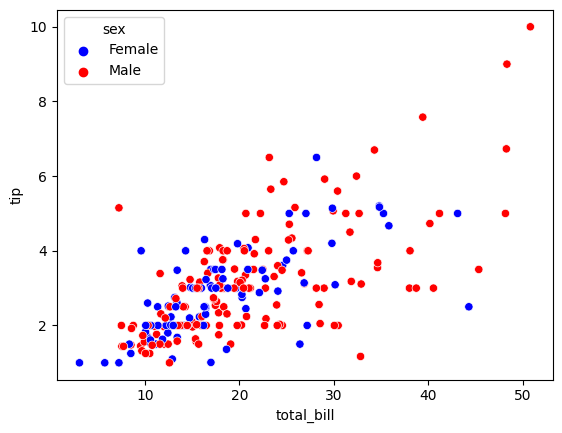

In [5]:
# let's load the tips dataset from seaborn library
tips_df = sns.load_dataset('tips')
print(tips_df.head())

# the hue colors can be used as html tag colors: 
sns.scatterplot(data=tips_df, x='total_bill', y='tip', hue='sex', hue_order=['Female', "Male"], palette={"Female": 'blue', 'Male':'red'})
plt.show()

One can use this link as a reference for [html colors](https://www.computerhope.com/htmcolor.htm#:~:text=HTML%20color%20codes%20are%20hexadecimal%20triplets%20representing%20the,and%20all%20are%20visible%20on%20a%2024-bit%20display.)

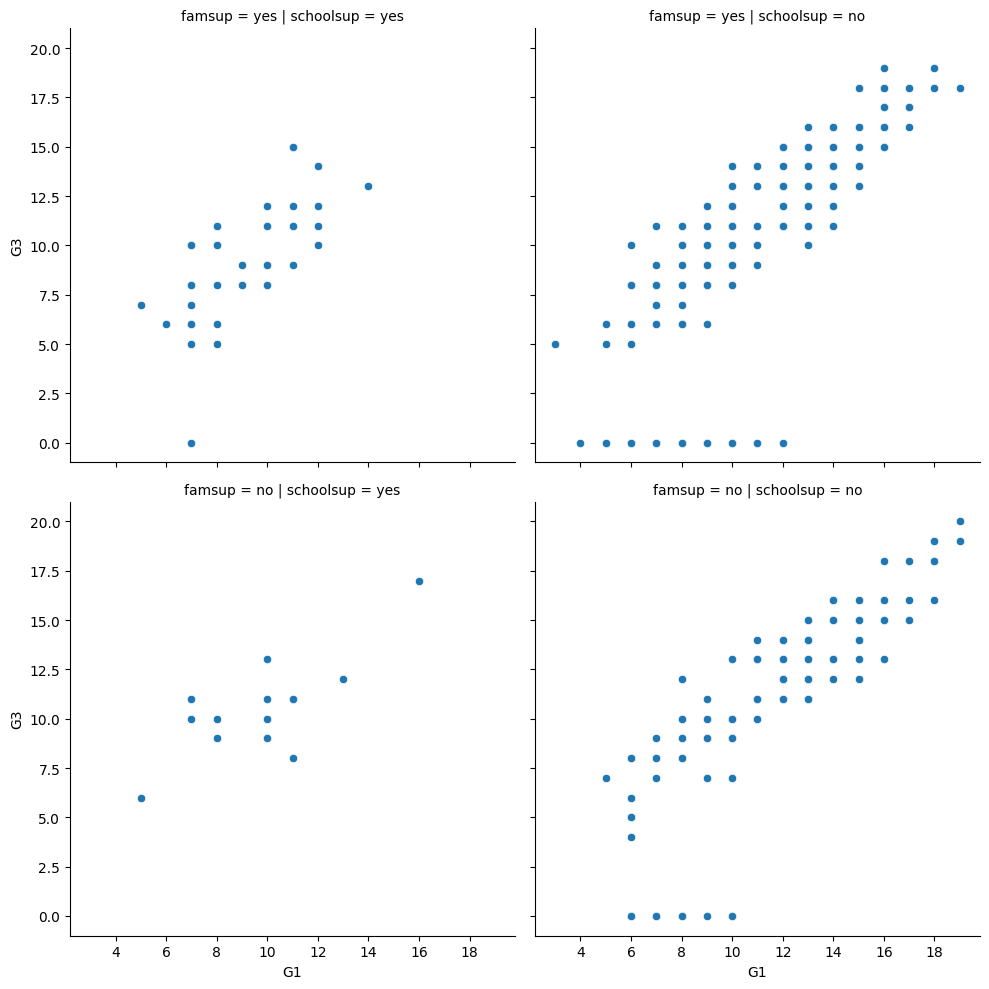

In [6]:
# even though the hue paramater in the plotting functions might provide additional insight. It is not powerful enough to see the whole image
# mainly when it comes to subgroups. For a better idea, it might be good to use the relplot: plotting relational plot 

students_data_link = "https://assets.datacamp.com/production/repositories/3996/datasets/61e08004fef1a1b02b62620e3cd2533834239c90/student-alcohol-consumption.csv"

students_df = pd.read_csv(students_data_link)

# Adjust further to add subplots based on family support
sns.relplot(x="G1", y="G3", 
            data=students_df,
            kind="scatter", 
            col="schoolsup",
            col_order=["yes", "no"],
            row = 'famsup', 
            row_order = ['yes', 'no'])

# Show plot
plt.show()

Thanks to this visualization, we can state that the final grade correlates with the midterm grade regardless with the suported received by the student.

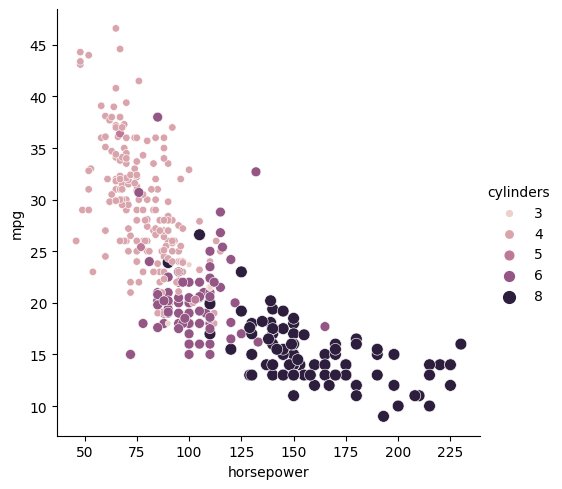

In [7]:
# Import Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

mpg = pd.read_csv("https://assets.datacamp.com/production/repositories/3996/datasets/e0b285b89bdbfbbe8d81123e64727ff150d544e0/mpg.csv")

# Create scatter plot of horsepower vs. mpg
sns.relplot(x="horsepower", y="mpg", 
            data=mpg, kind="scatter", 
            size="cylinders", hue='cylinders') # this changes the size of the points according to the values of the argument "size"

# Show plot
plt.show()

This plot shows that cars with larger horsepower are generally associated with larger cylinders and tend to consume less fuel.

Line Plots are quite convenient to track a certain value's variation in respect to another range of values (mainly time).

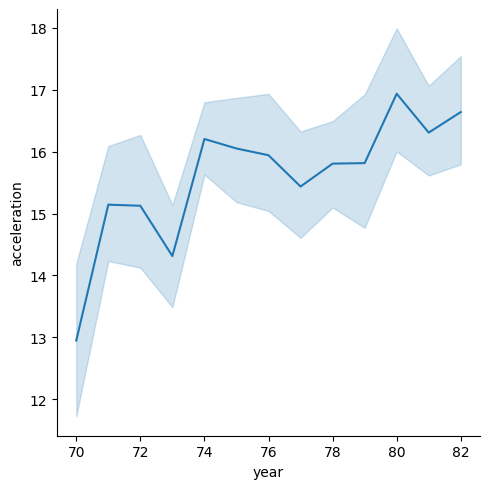

In [8]:
# let's consider the cars dataset
mpg = mpg.rename(columns={"model_year":"year"})


# we will plot the evaluation of mpg with respect to the year column. 
# we can see that the year column has repeated values, thus, seaborn internally considers a statistical value, aggregates and calculates 
# a 95% confidence interval for that statistical value, the default is mean

sns.relplot(data=mpg, x='year', y='acceleration', kind='line')

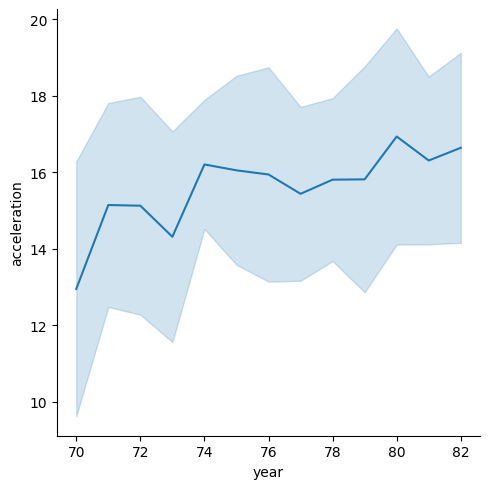

In [9]:
# let's choose a different statistical value for the statistical value say standard deviation

sns.relplot(data=mpg, x='year', y='acceleration', kind='line', ci='sd')

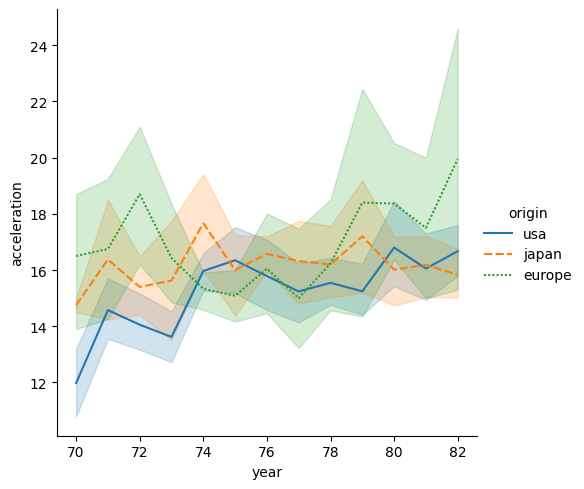

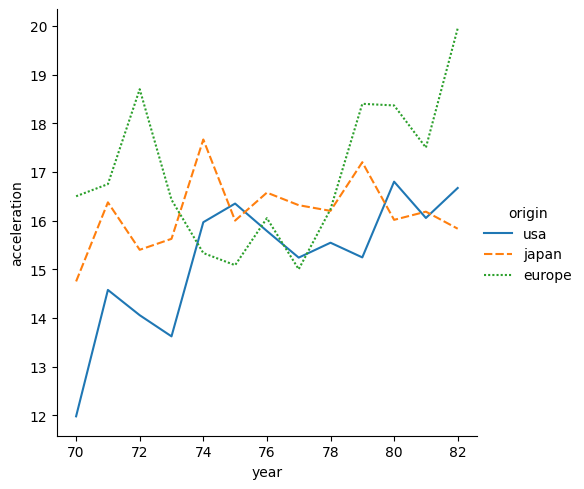

In [10]:
# let's add some customization, if the column acceleration is associated with different value of another column, we can plot the variation
# with respect to the subgroups as follows:
sns.relplot(data=mpg, x='year', y='acceleration', kind='line', style='origin', hue='origin')
# I think the shaded part here is more distracting than actually useful, let's eliminate for the moment
sns.relplot(data=mpg, x='year', y='acceleration', kind='line', style='origin', hue='origin', ci=None)


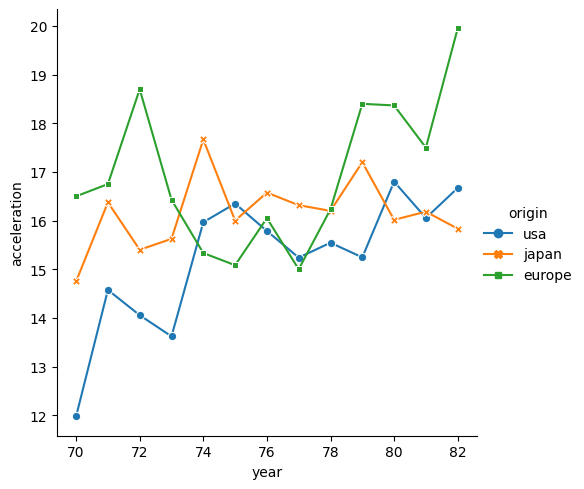

In [11]:
# sometimes this dashed lines are not so appealing, we might want to add the actual data points for references
sns.relplot(data=mpg, x='year', y='acceleration', kind='line', style='origin', hue='origin', ci=None, dashes=False, markers=True)


## Data visualization with categorical columns, variables
Seaborn offers great visualizations specific for categorical values

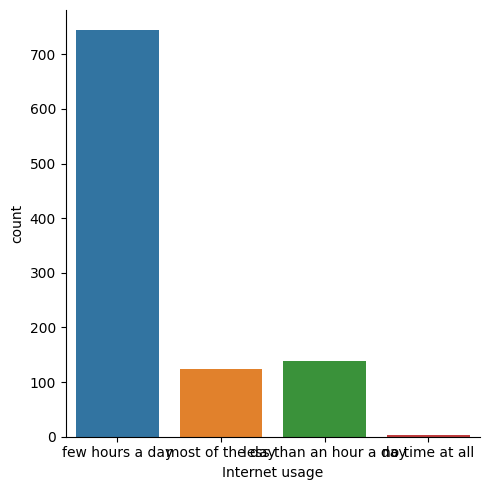

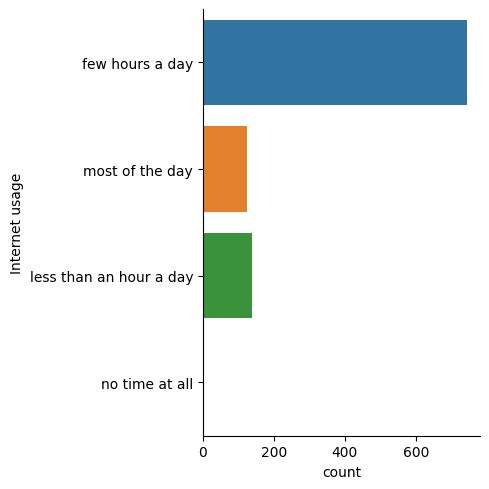

In [12]:
# the catplot function can be considered the equivalent fo relplot for categorical variables
# let's consider data collected for surveys

sur_data_link = "https://assets.datacamp.com/production/repositories/3996/datasets/ab13162732ae9ca1a9a27e2efd3da923ed6a4e7b/young-people-survey-responses.csv"
survey_data = pd.read_csv(sur_data_link)

# let's consider some count plots

sns.catplot(kind='count', data=survey_data, x='Internet usage')
plt.show() 

# this was vertical, let's try it horizontally

sns.catplot(kind='count', data=survey_data, y='Internet usage')
plt.show() 


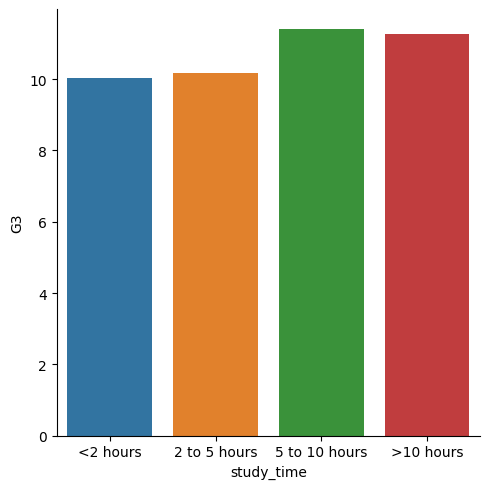

In [13]:
# let's check some bar plots

category_order = ["<2 hours", 
                  "2 to 5 hours", 
                  "5 to 10 hours", 
                  ">10 hours"]

# Turn off the confidence intervals
sns.catplot(x="study_time", y="G3",
            data=students_df,
            kind="bar",
            order=category_order, ci=None)

# Show plot
plt.show()

### box plots
Box plots are so powerful as they summarize the main distribution of a quantitative variable.

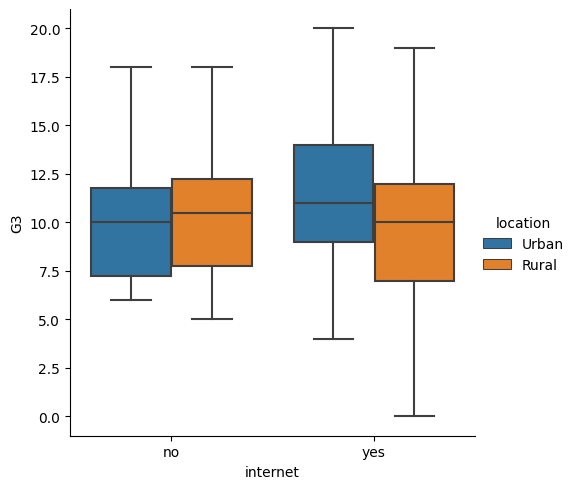

In [14]:
# Create a box plot with subgroups and omit the outliers 
# we choose x as categorical variables to see how the value y varies with respect to the values of x.
# the hue argument considers the subgroups offered by that parameter
sns.catplot(kind='box', data=students_df, x='internet', y='G3', hue='location', sym='')
# Show plot
plt.show()

## Customizing Seaborn
Customizing a plot generally helps put forth the general conclusion, and direct the audience in the desired direction. There is a number of components that can be twicked and modified to deliver the data visualization suitable for our purposes.
* style: determines mainly the background of the visualizations
* palettes: determine the colours used for visualizations
* context: sets the scale of the visualizations: how large should the visualizations depending on the purpose. 

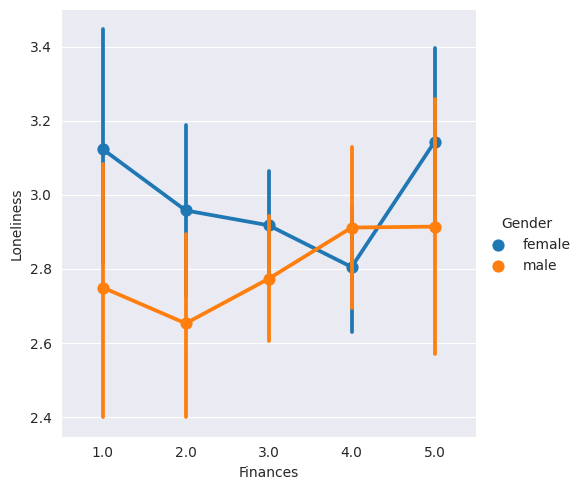

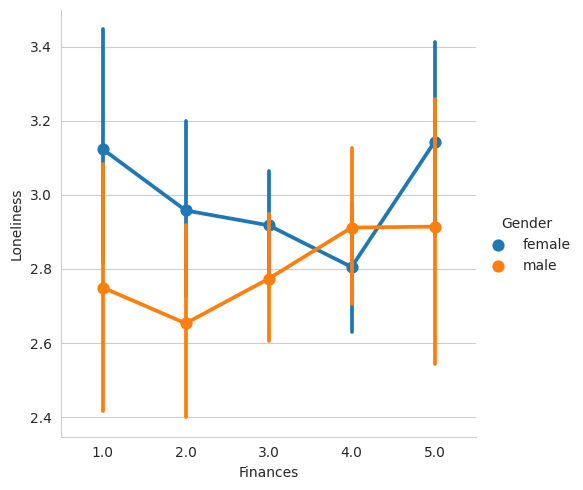

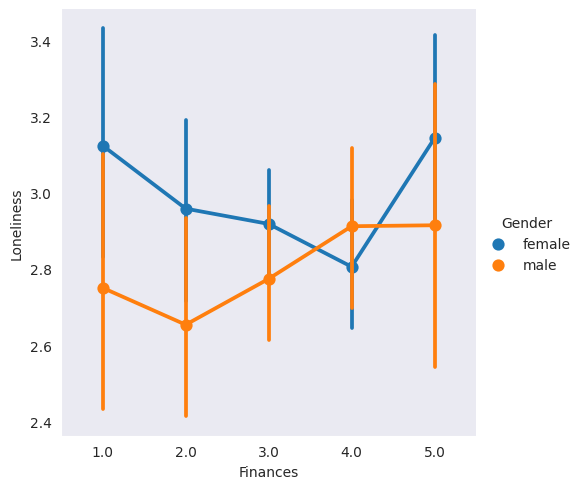

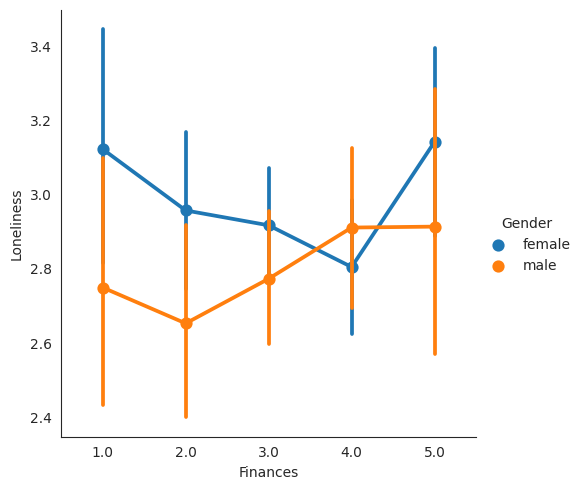

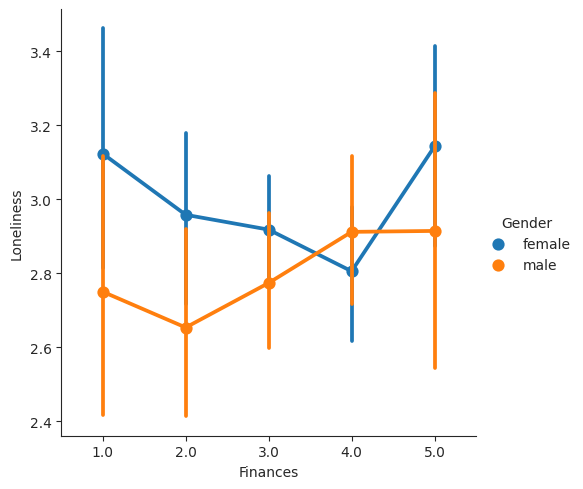

In [15]:
## let's consider the same visualization with different styles
styles = ["darkgrid", "whitegrid", "dark", "white", "ticks"]
for s in styles:
    sns.set_style(s)
    sns.catplot(data=survey_data, x='Finances', y='Loneliness', hue='Gender', kind='point', )
    plt.show()

In [16]:
## we can set the size of the visualizations using
from random import choice
sns.set_context(choice(['paper', 'talk', 'notebook', 'poster']))

KEY NOTE ABOUT SEABORN:  
Seaborn uses two types of objects to display visualizations: either AxesSubplots or FacetGrid.  
Methods that support at most only one plot generally return AXesSubplots objects. On the other hand, methods capable of displaying multiple plots generally return FacetGrid objects.

<class 'seaborn.axisgrid.FacetGrid'>


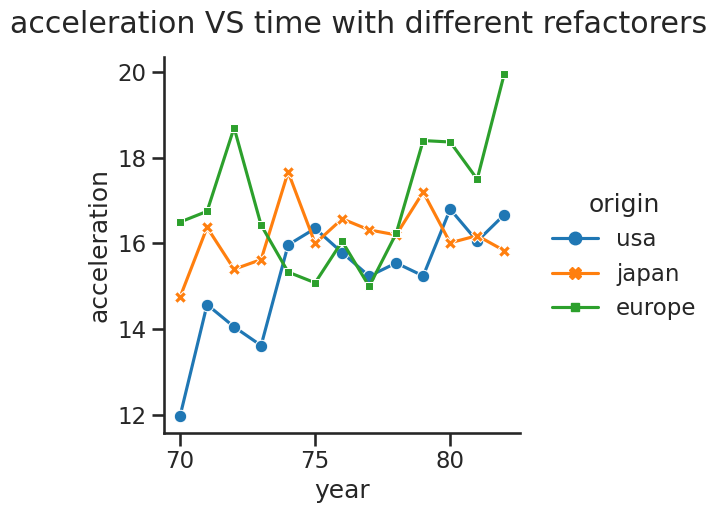

<class 'matplotlib.axes._subplots.AxesSubplot'>


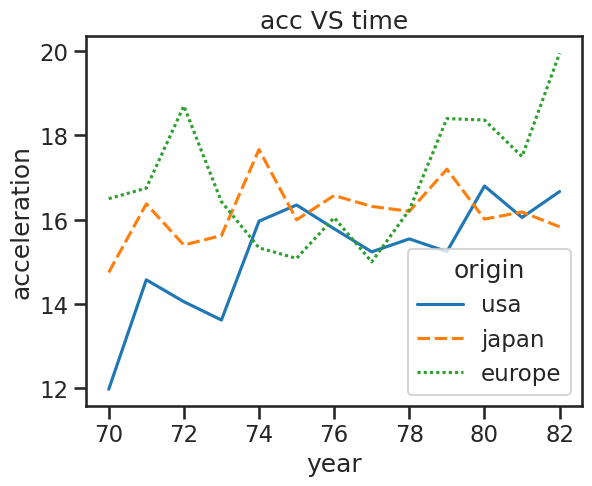

In [17]:
## ADDING TITLE AND LABELS
# for the title the operation differs depending on whether we have Axis object or a FacetGrid plot

## for facetGrid
g = sns.relplot(data=mpg, x='year', y='acceleration', kind='line', style='origin', hue='origin', ci=None, dashes=False, markers=True)
print(type(g))
g.fig.suptitle("acceleration VS time with different refactorers", y=1.04)
plt.show()

g2 = sns.lineplot(data=mpg,  x='year', y='acceleration', style='origin', hue='origin', ci=None)
print(type(g2))
g2.set_title("acc VS time")
plt.show()


# for facet with multiple subplots, we can use g.set_titles()

In [18]:
## fortunately the labels and ticks are common between two objects
g.set(xlabel="Model Year", ylabel="Mean acceleration")
g2.set(xlabel="Model Year", ylabel="Mean acceleration")

# rotate the x ticks 
plt.xticks(rotation=90)
plt.show()